# Import Libraries

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

# Import and Process Data

First, we bring in data from the world happiness report. There is an individual CSV file for the years 2015 to 2019, as the report has evolved over the years, each dataset has minor fluctuations in formating and variable names. Due to this, we need to standardize all of the datasets and concatenate them into one. 

In [94]:

#Import CSV files
world_hap_2015 = pd.read_csv('data/2015.csv')
world_hap_2016 = pd.read_csv('data/2016.csv')
world_hap_2017 = pd.read_csv('data/2017.csv')
world_hap_2018 = pd.read_csv('data/2018.csv')
world_hap_2019 = pd.read_csv('data/2019.csv')

#Split out country and region, we will later merge this with the original data to make sure there is a 'region' column
#We need to do this because not all datasets have the 'region' column and we will drop it for concatenating before bringing it back in
country_and_region = world_hap_2015[['Country', 'Region']]


world_hap_2015.drop(columns=['Region', 'Happiness Rank', 'Standard Error'], inplace=True)
world_hap_2016.drop(columns=['Region', 'Happiness Rank', 'Lower Confidence Interval', 'Upper Confidence Interval'], inplace=True)
world_hap_2017.drop(columns=['Happiness.Rank', 'Whisker.high', 'Whisker.low'], inplace=True)
world_hap_2018.drop(columns=['Overall rank'], inplace=True)
world_hap_2019.drop(columns=['Overall rank'], inplace=True)

world_hap_2015.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity', 'Dystopia_Residual']
world_hap_2016.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption', 'Generosity', 'Dystopia_Residual']

world_hap_2017.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom','Generosity', 'Corruption', 'Dystopia_Residual']
world_hap_2018.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']
world_hap_2019.columns = ['Country', 'Happiness_Score', 'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']

world_hap_2018['Dystopia_Residual'] = world_hap_2018['Happiness_Score'] - (world_hap_2018['GDP_per_Capita']+world_hap_2018['Social_Support']+world_hap_2018['Life_Expectancy']+world_hap_2018['Freedom']+world_hap_2018['Generosity']+world_hap_2018['Corruption'])
world_hap_2019['Dystopia_Residual'] = world_hap_2019['Happiness_Score'] - (world_hap_2019['GDP_per_Capita']+world_hap_2019['Social_Support']+world_hap_2019['Life_Expectancy']+world_hap_2019['Freedom']+world_hap_2019['Generosity']+world_hap_2019['Corruption'])

world_hap_2015['year'] = pd.to_datetime('2015', format='%Y')
world_hap_2016['year'] = pd.to_datetime('2016', format='%Y')
world_hap_2017['year'] = pd.to_datetime('2017', format='%Y')
world_hap_2018['year'] = pd.to_datetime('2018', format='%Y')
world_hap_2019['year'] = pd.to_datetime('2019', format='%Y')

world_hap = pd.concat([world_hap_2015, world_hap_2016, world_hap_2017, world_hap_2018, world_hap_2019])
world_hap = world_hap.merge(country_and_region, how='inner', on='Country')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



(757, 11)

In [95]:
gdp_contribution = pd.read_csv('data/GDP_Contribution.csv')

In [96]:
world_hap = world_hap.merge(gdp_contribution, how='inner', on='Country')

In [97]:
# Access built-in Natural Earth data via GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Get a list (dataframe) of country centroids
centroids = world.centroid
centroid_list = pd.concat([world.name, centroids], axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """


In [98]:
world_hap = world_hap.merge(centroid_list, how='inner', left_on='Country', right_on='name')

In [99]:
world_hap.head()

,Corruption,Country,Dystopia_Residual,Freedom,GDP_per_Capita,Generosity,Happiness_Score,Life_Expectancy,Social_Support,year,Region,Year,GDP,Agriculture,Industry,Manufacturing,Services,CAGR,name,0
0,0.419780,Switzerland,2.517380,0.665570,1.39651,0.296780,7.587,0.941430,1.349510,2015-01-01,Western Europe,2019,703.1,1.0,26.0,19.0,70.9,0.020874971,Switzerland,POINT (8.11830 46.79174)
1,0.412030,Switzerland,2.694630,0.585570,1.52733,0.280830,7.509,0.863030,1.145240,2016-01-01,Western Europe,2019,703.1,1.0,26.0,19.0,70.9,0.020874971,Switzerland,POINT (8.11830 46.79174)
2,0.367007,Switzerland,2.276716,0.620071,1.56498,0.290549,7.494,0.858131,1.516912,2017-01-01,Western Europe,2019,703.1,1.0,26.0,19.0,70.9,0.020874971,Switzerland,POINT (8.11830 46.79174)
3,0.357000,Switzerland,2.318000,0.660000,1.42000,0.256000,7.487,0.927000,1.549000,2018-01-01,Western Europe,2019,703.1,1.0,26.0,19.0,70.9,0.020874971,Switzerland,POINT (8.11830 46.79174)
4,0.343000,Switzerland,2.272000,0.572000,1.45200,0.263000,7.480,1.052000,1.526000,2019-01-01,Western Europe,2019,703.1,1.0,26.0,19.0,70.9,0.020874971,Switzerland,POINT (8.11830 46.79174)


In [120]:
world_hap['lon'] = world_hap[0].apply(lambda p: p.x)
world_hap['lat'] = world_hap[0].apply(lambda p: p.y)
world_hap.head()

,Corruption,Country,Dystopia_Residual,Freedom,GDP_per_Capita,Generosity,Happiness_Score,Life_Expectancy,Social_Support,year,...,GDP,Agriculture,Industry,Manufacturing,Services,CAGR,name,0,lon,lat
0,0.39300,Finland,2.71400,0.59600,1.34000,0.15300,7.769,0.98600,1.58700,2019-01-01,...,269.3,2.0,24.0,15.0,60.0,0.008656162,Finland,POINT (26.21176 64.50409),26.211765,64.504094
1,0.39300,Finland,2.58500,0.68100,1.30500,0.20200,7.632,0.87400,1.59200,2018-01-01,...,269.3,2.0,24.0,15.0,60.0,0.008656162,Finland,POINT (26.21176 64.50409),26.211765,64.504094
2,0.41000,Denmark,2.39400,0.59200,1.38300,0.25200,7.600,0.99600,1.57300,2019-01-01,...,350.1,1.0,21.0,13.0,64.8,0.00933971,Denmark,POINT (9.87637 56.06393),9.876373,56.063934
3,0.34000,Norway,2.38300,0.68600,1.45600,0.28600,7.594,0.86100,1.58200,2018-01-01,...,403.3,2.0,29.0,6.0,57.7,-0.006789061,Norway,POINT (15.46812 69.15686),15.468120,69.156856
4,0.41978,Switzerland,2.51738,0.66557,1.39651,0.29678,7.587,0.94143,1.34951,2015-01-01,...,703.1,1.0,26.0,19.0,70.9,0.020874971,Switzerland,POINT (8.11830 46.79174),8.118301,46.791738


# Data Exploration

## Average Happiness by Region

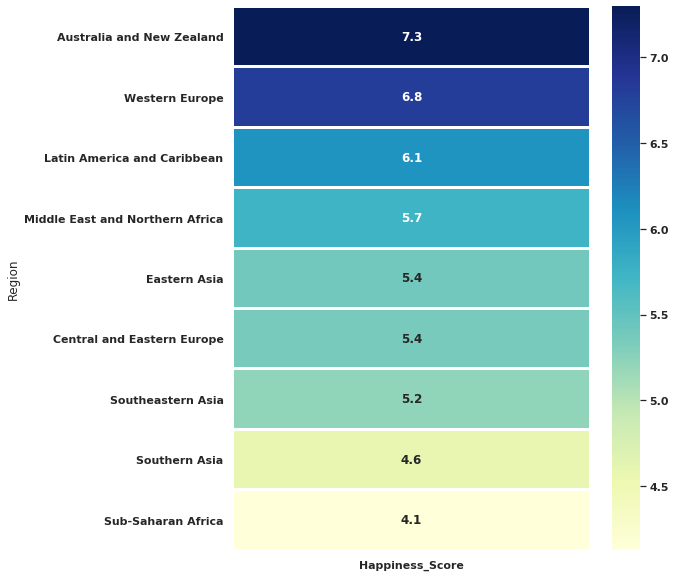

In [127]:
hap_by_region = world_hap.groupby('Region').agg({'Happiness_Score': np.nanmean}).sort_values(by='Happiness_Score', ascending=False)

# plot a heatmap with annotation
plt.figure(figsize = (8,10))
sns.heatmap(hap_by_region, annot=True, annot_kws={"size": 12}, linewidths=2, cmap="YlGnBu")


# The following code was found on github forums posted by user SalMac86 to modify the sizing of the heatmap
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

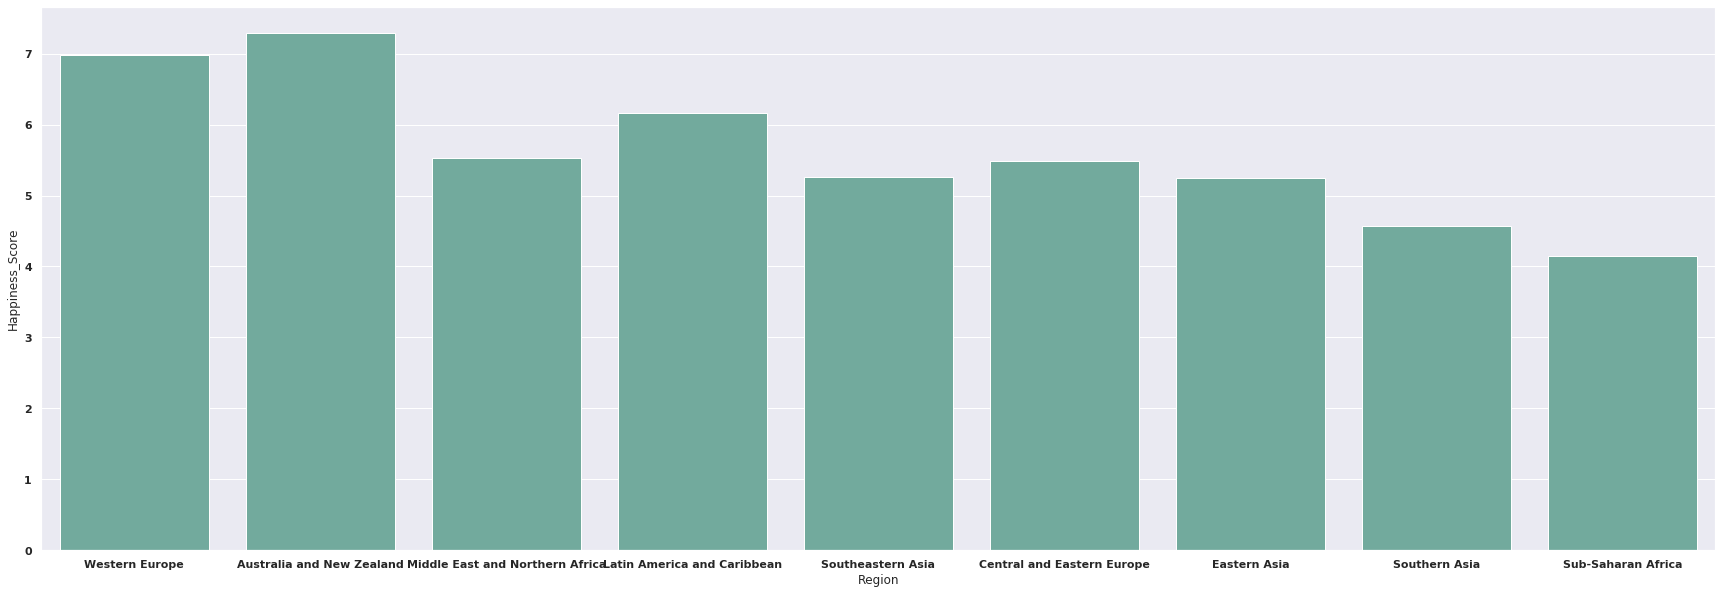

In [102]:
# import libraries
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# Set the figure size
plt.figure(figsize=(30, 10))

world_hap = world_hap.sort_values(['Happiness_Score'], ascending=False).reset_index(drop=True)

# plot a bar chart
sns.barplot(
    x="Region", 
    y="Happiness_Score", 
    data=world_hap, 
    estimator=np.median, 
    ci=None, 
    color='#69b3a2')

From the above table, we find that Australia, New Zealand, North America, and Western Europe are the most happy regions.

## Largest Contributor to Happiness by Region

In [103]:
world_hap_contribution = world_hap.copy()

#Maybe replace this with an apply statement
world_hap_contribution['GDP_per_Capita'] = world_hap_contribution['GDP_per_Capita'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Freedom'] = world_hap_contribution['Freedom'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Generosity'] = world_hap_contribution['Generosity'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Life_Expectancy'] = world_hap_contribution['Life_Expectancy'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Social_Support'] = world_hap_contribution['Social_Support'] / world_hap_contribution['Happiness_Score']
world_hap_contribution['Corruption'] = world_hap_contribution['Corruption'] / world_hap_contribution['Happiness_Score']

contribution_by_region = world_hap_contribution.groupby('Region').agg({'GDP_per_Capita': np.nanmean, 'Freedom': np.nanmean, 'Generosity': np.nanmean, 'Life_Expectancy': np.nanmean, 'Social_Support': np.nanmean, 'Corruption': np.nanmean})

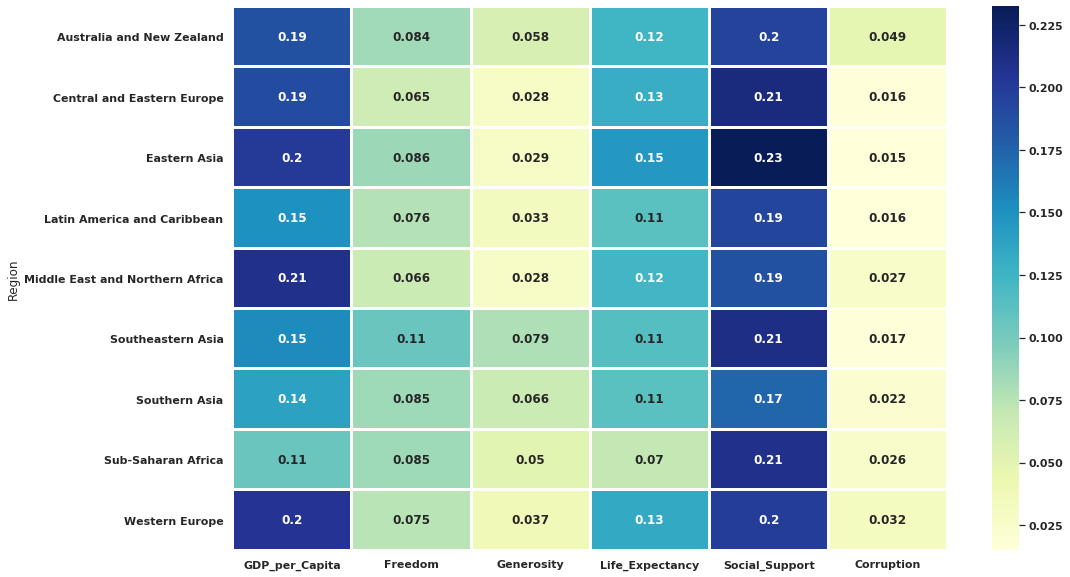

In [123]:
# plot a heatmap with annotation
plt.figure(figsize = (16,10))
sns.heatmap(contribution_by_region, annot=True, annot_kws={"size": 12}, linewidths=2, cmap="YlGnBu")


# The following code was found on github forums posted by user SalMac86 to modify the sizing of the heatmap
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

## Data Analysis

We want to find the industries that contribute the most to happiness in various countries and regions. From there, our goal is to identify any glaring trends in the relationship between GDP, industries, and happiness.

In [107]:
gdp_analysis = world_hap[['Country', 'GDP_per_Capita', 'Happiness_Score', 'year', 'Region', 'GDP', 'Agriculture', 'Industry', 'Manufacturing', 'Services']]

In [108]:
gdp_analysis.head()

,Country,GDP_per_Capita,Happiness_Score,year,Region,GDP,Agriculture,Industry,Manufacturing,Services
0,Finland,1.34000,7.769,2019-01-01,Western Europe,269.3,2.0,24.0,15.0,60.0
1,Finland,1.30500,7.632,2018-01-01,Western Europe,269.3,2.0,24.0,15.0,60.0
2,Denmark,1.38300,7.600,2019-01-01,Western Europe,350.1,1.0,21.0,13.0,64.8
3,Norway,1.45600,7.594,2018-01-01,Western Europe,403.3,2.0,29.0,6.0,57.7
4,Switzerland,1.39651,7.587,2015-01-01,Western Europe,703.1,1.0,26.0,19.0,70.9


In [109]:
gdp_analysis['GDP_Contribution'] = gdp_analysis['GDP_per_Capita'] / gdp_analysis['Happiness_Score']


gdp_analysis['Agriculture_Contribution'] = gdp_analysis['GDP_Contribution'] * (gdp_analysis['Agriculture'] / 100)
gdp_analysis['Industry_Contribution'] = gdp_analysis['GDP_Contribution'] * (gdp_analysis['Industry'] / 100)
gdp_analysis['Manufacturing_Contribution'] = gdp_analysis['GDP_Contribution'] * (gdp_analysis['Manufacturing'] / 100)
gdp_analysis['Services_Contribution'] = gdp_analysis['GDP_Contribution'] * (gdp_analysis['Services'] / 100)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [110]:
gdp_analysis.head()

,Country,GDP_per_Capita,Happiness_Score,year,Region,GDP,Agriculture,Industry,Manufacturing,Services,GDP_Contribution,Agriculture_Contribution,Industry_Contribution,Manufacturing_Contribution,Services_Contribution
0,Finland,1.34000,7.769,2019-01-01,Western Europe,269.3,2.0,24.0,15.0,60.0,0.172480,0.003450,0.041395,0.025872,0.103488
1,Finland,1.30500,7.632,2018-01-01,Western Europe,269.3,2.0,24.0,15.0,60.0,0.170991,0.003420,0.041038,0.025649,0.102594
2,Denmark,1.38300,7.600,2019-01-01,Western Europe,350.1,1.0,21.0,13.0,64.8,0.181974,0.001820,0.038214,0.023657,0.117919
3,Norway,1.45600,7.594,2018-01-01,Western Europe,403.3,2.0,29.0,6.0,57.7,0.191730,0.003835,0.055602,0.011504,0.110628
4,Switzerland,1.39651,7.587,2015-01-01,Western Europe,703.1,1.0,26.0,19.0,70.9,0.184066,0.001841,0.047857,0.034973,0.130503


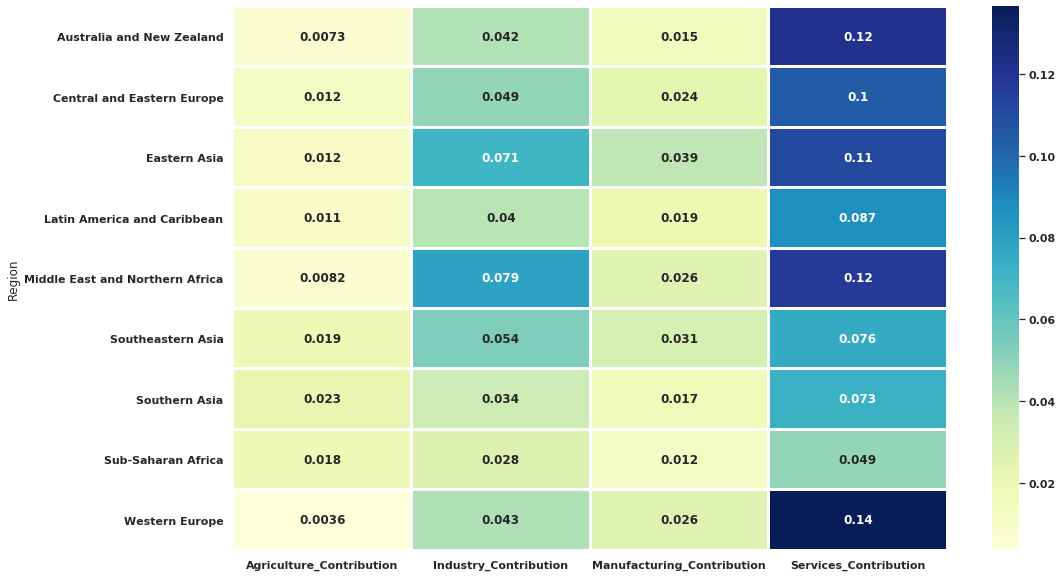

In [128]:
gdp_analysis_copy = gdp_analysis.copy()

contribution_by_industry = gdp_analysis_copy.groupby('Region').agg({'Agriculture_Contribution': np.nanmean, 'Industry_Contribution': np.nanmean, 'Manufacturing_Contribution': np.nanmean, 'Services_Contribution': np.nanmean})

# plot a heatmap with annotation
plt.figure(figsize = (16,10))
sns.heatmap(contribution_by_industry, annot=True, annot_kws={"size": 12}, linewidths=2, cmap="YlGnBu")


# The following code was found on github forums posted by user SalMac86 to modify the sizing of the heatmap
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!